# Datos para el Perceptrón

Para que puedan probar la implementación del perceptrón van a necesitar datos. Vamos a ver cómo generar conjuntos de datos al azar y para los problemas de la práctica.

Empezamos por importar las librerías y módulos que venimos usando, esta vez con el agregado de *cm* que son los colormaps de matplotlib.

In [1]:
import numpy as num
from matplotlib import pyplot as mpl, cm

In [2]:
# Especificamos las dimensiones de los datos.

N = 5       # N variables de entrada.
M = 3       # M variables objetivo.
P = 20      # P instancias.

Los datos de entrada serán aleatorios con distribución uniforme entre -9 y 9.
Con la función *concatenate* podemos agregar una columna de *unos* que servirán como unidades umbral. Notar que es indistinto que las unidades umbrales valgan +1 o -1, ya que solo es necesario cambiar el signo del valor umbral.
Los valores objetivo serán generados tomando el *signo* de una combinación lineal de las variables de entrada producida por una matriz de mezcla *m*, también generada al azar.

In [3]:
x = num.random.uniform( -9, 9, (P,N))
xp = num.concatenate( ( x, num.ones((P,1)) ), axis=1)

m = num.random.normal( 0, 1, (N+1,M))

z = num.sign(num.dot( xp, m))

Los datos se pueden visualizar en una figura con 2 subplots. (__[ver documentación](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.figure.Figure.html?highlight=add_subplot#matplotlib.figure.Figure.add_subplot)__)

Para mostrar los valores de las matrices en escala de gris se puede usar el mapa de color *cm.gray*.

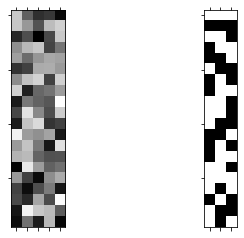

In [4]:
fig = mpl.figure()
xfig = fig.add_subplot(1,2,1, xticklabels=[], yticklabels=[])
zfig = fig.add_subplot(1,2,2, xticklabels=[], yticklabels=[])

xfig.matshow( x, cmap=cm.gray)
zfig.matshow( z, cmap=cm.gray)

mpl.show()

# Funciones Lógicas

En el problema de las funciones lógicas **AND** y **OR** la entrada deberá consistir en todas las combinaciones de valores de verdad de 2 variables booleanas. Expresando **Falso** con -1 y **Verdadero** con +1 se pueden escribir fácilmente a mano.

Los datos objetivo también tendrán 2 variables, la primera con el resultado del operador **AND** y la segunda del **OR**, y también se pueden armar a mano.

In [5]:
logic_input = num.array( [ [ -1, -1 ],
                           [ -1, +1 ],
                           [ +1, -1 ],
                           [ +1, +1 ] ] )

logic_target = num.array( [ [ -1, -1 ],
                            [ -1, +1 ],
                            [ -1, +1 ],
                            [ +1, +1 ] ] )

# OCR

Para el problema de reconocimiento de caracteres tienen un archivo de texto con un ejemplo de cómo especificar las letras en una matriz de 5x5.
Este archivo se puede levantar con la función *loadtxt* de *numpy*, pero el resultado directo es un arreglo de 130 filas por 5 columnas, es decir, todas las letras apiladas en una sola matriz.

Para visualizarlas se puede hacer un *reshape* de 26x5x5, esto es, 26 letras en grillas de 5x5.

Pero para poder pasarle estos datos al perceptrón como entrada debemos expresar cada letra cómo un vector de 5\*5, es decir, los datos tendrán una dimensión de 26x25.

Y para convertir los valores binarios (0,1) a bipolares (-1,+1) sencillamente multiplicamos por 2 y restamos 1.

In [6]:
letras = num.loadtxt("letras.txt")

letras.shape

(130, 5)

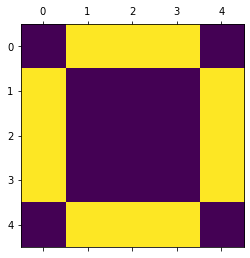

In [7]:
L = letras.reshape((26,5,5))

mpl.matshow( L[14])

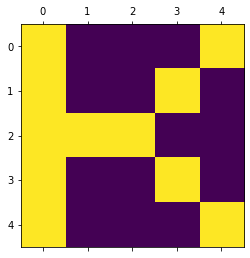

In [8]:
mpl.matshow( L[10])

In [9]:
x = letras.reshape((26,25))*2-1

x[:5]

array([[-1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
         1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.],
       [ 1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,
         1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.],
       [-1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.],
       [ 1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,
        -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,
         1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.]])

Para generar los datos objetivo puede resultar útil usar la función *product* de la librería de herramientas de iteración. Esta función nos permite generar todas las combinaciones posibles de *repeat* valores pasados como parámetro. 
(__[ver documentación](https://docs.python.org/2/library/itertools.html#itertools.product)__)

Para elegir 26 al azar sin repetición se puede usar la función *permutation*.

In [10]:
import itertools

z = list( itertools.product( [-1,1], repeat=2))

print( num.array(z))

[[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]]


In [11]:
num.random.permutation(10)

array([0, 5, 6, 1, 3, 7, 2, 4, 9, 8])

In [12]:
num.random.permutation( z)

array([[-1, -1],
       [-1,  1],
       [ 1,  1],
       [ 1, -1]])

---
Tengan especial cuidado con las dimensiones de los arreglos, sobre todo al hacer operaciones y guardar los resultados.

Por ejemplo, planteando las siguientes operaciones, de una forma funcionan de la manera esperada y de la otra no.

Les dejo que investiguen por qué ocurre esto en cada caso.

In [13]:
x = num.random.uniform( -1, 1, (10,4))
z = num.random.uniform( 0, 1, (10,3))

w = num.random.normal( 0, 1, (4,3))

y = num.dot(x,w)
e = z-y

In [14]:
y0 = num.dot( x[0], w)
e0 = z[0]-y0
num.dot( x[0].T, e0)

ValueError: shapes (4,) and (3,) not aligned: 4 (dim 0) != 3 (dim 0)

In [15]:
num.outer( x[0], e0)

array([[-0.90462492,  0.29707552,  0.23519339],
       [-1.44211941,  0.47358674,  0.37493655],
       [-0.26292679,  0.0863442 ,  0.06835832],
       [-0.54465912,  0.17886406,  0.1416059 ]])